# Scikit - Image
- use numpy arrays as arguments

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [3,3]
import numpy as np
import copy
from skimage import data, color, io
import random

- RGB to gray converting <br>
$$ Y = 0.2125*R + 0.7154*G + 0.0721*B $$

(512, 512, 3)
[154 147 151]


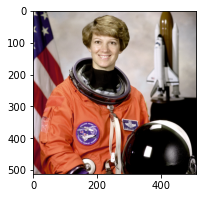

In [8]:
original = data.astronaut()
plt.imshow(original)
print(original.shape)
io.imsave('Example.png', original)
print(original[0,0,:])

(512, 512)

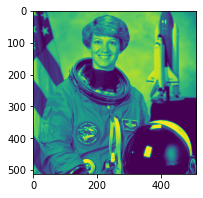

In [26]:
gray = color.rgb2gray(original)
gray = gray*255
plt.imshow(gray)
gray.shape

In [27]:
gray_opt = np.round(original[:,:,0]*0.2125 + original[:,:,1]*0.654 + original[:,:,2]*0.521)
gray - gray_opt

array([[-65.2241, -53.2109, -44.7651, ..., -48.873 , -45.1556, -47.3739],
       [-73.725 , -61.2183, -53.4915, ..., -48.5201, -46.5922, -44.7306],
       [-82.5846, -75.3663, -70.4346, ..., -50.5163, -48.1634, -47.2355],
       ...,
       [-76.1674, -76.0953, -73.6683, ...,   0.    ,  -0.9279,   0.    ],
       [-72.9529, -73.5241, -76.6723, ...,  -0.9279,   0.    ,   0.    ],
       [-74.027 , -72.8866, -73.5261, ...,   0.    ,   0.    ,   0.    ]])

In [35]:
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

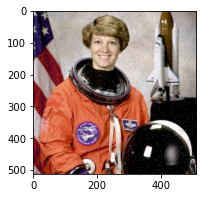

In [36]:
spn = sp_noise(original, 0.01)
spn.shape
plt.imshow(spn)

(512, 512)


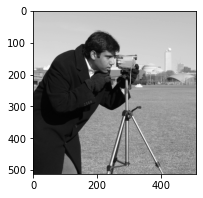

In [37]:
camera = data.camera()
print(camera.shape)
plt.imshow(camera, cmap='gray')

[[211 211 212 ...  24  29  30]
 [211 211 211 ...  25  28  25]
 [211 211 212 ...  24  23  21]
 ...
 [ 30  28  28 ... 144 146 145]
 [ 30  28  28 ... 144 145 145]
 [ 30  29  28 ... 144 145 144]]


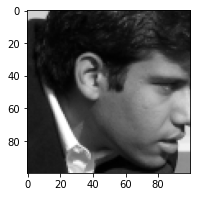

In [38]:
crop = camera[100:200, 150:250]
plt.imshow(crop, cmap = 'gray')
print(crop)

In [48]:
print(np.max(camera), np.min(camera))
result = copy.deepcopy(camera)

255 0


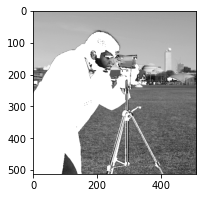

In [49]:
# 1. 87 이하 픽셀 가장 밝게
mask = result  < 87
result[mask] = 255
#
plt.imshow(result, cmap='gray')

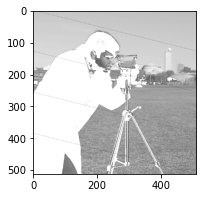

In [50]:
# 2. 검은 점선 : 좌표 [x, (4 * x) % len(camera)]
x = np.arange(len(result))
y = (4*x)%len(camera)
result[x, y] = 0

#
plt.imshow(result, cmap='gray')

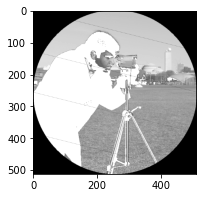

In [58]:
# 3. np.ogrid 활용해서 원형 마스크 씌우기
(w, h) = result.shape
X, Y = np.ogrid[:w,:h]
outer_mask = (X-w/2)**2 + (Y-h/2)**2 > (w/2)**2
result[outer_mask] = 0

#
plt.imshow(result, cmap='gray')

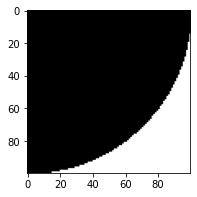

In [41]:
# hint
X, Y = np.ogrid[:100, :100]
mask = X**2 + Y**2 > 10000
plt.imshow(mask, cmap='gray')